## Summer 2023 Data Science Intern Challenge 
By Prince Ogwu

In [20]:
# import Librabries
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\15DC Workspace\\Datafest Africa'

In [157]:
path=('2019winter dsc challenge.csv')
df_shopify= pd.read_csv(path)

## Question 1: 

### Given some sample data, write a program to answer the following.
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

link to the dataset: https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0
 

## A. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [158]:
#run a qucik check on the dataset top 5 and bottom rows
df_shopify

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,date,time_order
0,1,53,746,224,2,cash,03/13/2017 12:36,13/03/2017,12:36 PM
1,2,92,925,90,1,cash,03/03/2017 17:38,03/03/2017,5:38 PM
2,3,44,861,144,1,cash,03/14/2017 4:23,14/03/2017,4:23 AM
3,4,18,935,156,1,credit_card,03/26/2017 12:43,26/03/2017,12:43 PM
4,5,18,883,156,1,credit_card,03/01/2017 4:35,01/03/2017,4:35 AM
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,03/30/2017 13:47,30/03/2017,1:47 PM
4996,4997,48,789,234,2,cash,03/16/2017 20:36,16/03/2017,8:36 PM
4997,4998,56,867,351,3,cash,03/19/2017 5:42,19/03/2017,5:42 AM
4998,4999,60,825,354,2,credit_card,03/16/2017 14:51,16/03/2017,2:51 PM


In [163]:
df_shopify[['order_amount', 'total_items']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_amount,5000.0,3145.1280,41282.539349,90.0,163.0,284.0,390.0,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.0,2.0,3.0,2000.0


<AxesSubplot:xlabel='order_amount'>

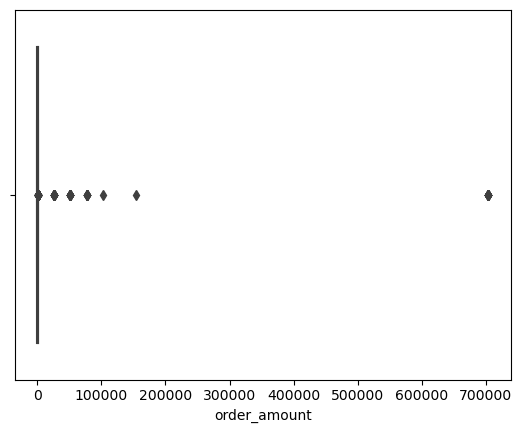

In [140]:
sb.boxplot(x= df_shopify['order_amount'])
# A box plot

<AxesSubplot:ylabel='Density'>

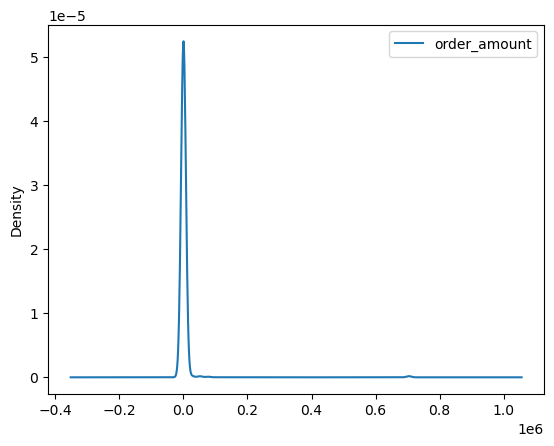

In [141]:
#Let's use a density plot to drive home our point
pd.DataFrame(df_shopify['order_amount']).plot(kind='density')

### There is an outlier in the data, the density plot above is completely skewed to the right;

- Outliers: There are order_amount with very high value and this has skewed the overall Average value.Removing the outliers from the dataset and recalculating the Average value would give a more accurate picture of the average order value.

- Large Order placement: Some items had large demand,and that has equally affected the Average Value and make it appear higher than it actually is. It would be better to take a median instead of mean to check the average order value as median is not affected by large values.

In [162]:
# filter the DataFrame to only show rows where order_amount > 100000
df_shopify[df_shopify['order_amount'] > 100000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,date,time_order
15,16,42,607,704000,2000,credit_card,07/03/2017,4:00 AM
60,61,42,607,704000,2000,credit_card,04/03/2017,4:00 AM
520,521,42,607,704000,2000,credit_card,02/03/2017,4:00 AM
691,692,78,878,154350,6,debit,27/03/2017,10:51 PM
1104,1105,42,607,704000,2000,credit_card,24/03/2017,4:00 AM
1362,1363,42,607,704000,2000,credit_card,15/03/2017,4:00 AM
1436,1437,42,607,704000,2000,credit_card,11/03/2017,4:00 AM
1562,1563,42,607,704000,2000,credit_card,19/03/2017,4:00 AM
1602,1603,42,607,704000,2000,credit_card,17/03/2017,4:00 AM
2153,2154,42,607,704000,2000,credit_card,12/03/2017,4:00 AM


In [189]:
#Calculate the Average using the naive approach
naive_aov = df_shopify["order_amount"].sum() / df_shopify["order_id"].nunique()
print("Naive AOV: $" + str(naive_aov))

Naive AOV: $3145.128


In [165]:
# Create a new column that groups the orders by the number of items in the order
df_shopify["item_count"] = df_shopify.groupby("order_id")["total_items"].transform("count")


In [190]:
# Calculate the AOV using the total items ordered
clean_Aov = df_shopify['order_amount'].sum() / df_shopify['total_items'].sum()
print(f'Corrected AOV: ${clean_Aov:.2f}')

Corrected AOV: $357.92


## B. What metric would you report for this dataset?


- It's also important to note that the AOV value in itself does not provide a complete picture of the data, as it only gives an idea of the average order value and not the total order amount or items ordered. To gain a more clarity on the data, I have choosen to analyze other metrics such as median order value, median ordered items,unique payment methods used for placing orders,

In [145]:
#The median order value
df_shopify['order_amount'].median()

284.0

In [146]:
# The median items orederd
df_shopify['total_items'].median()

2.0

In [160]:
#Drop acolumn from the dateframe
#df_shopify.drop('created_at', inplace=True, axis=1)

In [172]:
df_shopify

,order_id,shop_id,user_id,order_amount,total_items,payment_method,date,time_order,item_count
0,1,53,746,224,2,cash,13/03/2017,12:36 PM,1
1,2,92,925,90,1,cash,03/03/2017,5:38 PM,1
2,3,44,861,144,1,cash,14/03/2017,4:23 AM,1
3,4,18,935,156,1,credit_card,26/03/2017,12:43 PM,1
4,5,18,883,156,1,credit_card,01/03/2017,4:35 AM,1
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,30/03/2017,1:47 PM,1
4996,4997,48,789,234,2,cash,16/03/2017,8:36 PM,1
4997,4998,56,867,351,3,cash,19/03/2017,5:42 AM,1
4998,4999,60,825,354,2,credit_card,16/03/2017,2:51 PM,1


In [179]:
#The various payment method used
df_shopify['payment_method'].unique()

array(['cash', 'credit_card', 'debit'], dtype=object)

In [184]:
# filter the DataFrame to only show unique payment_method
'''df_shopify[df_shopify['payment_method'] =='cash'].value_counts().sum()'''
df= df_shopify[df_shopify['payment_method'].isin(['cash', 'credit_card', 'debit'])]

In [185]:
# group the DataFrame by payment_method.
df = df.groupby('payment_method')['item_count'].sum()

print(df)

payment_method
cash           1594
credit_card    1735
debit          1671
Name: item_count, dtype: int64


## c. What is its value?

In [192]:
df_shopify.agg({'order_amount':['mean','median']})

,order_amount
mean,3145.128
median,284.000


The value of the average order value(AOV) in theis scenario is 3145.13 , as calculated over a 30day window. Since the median orver value is less affected by outlier, the midpoint value will be used. The value is 284.0

## Question 2:
### For this question you’ll need to use SQL. 
Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

Link to the sql-lab
https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL

## a. How many orders were shipped by Speedy Express in total?


In [ ]:
#Query
SELECT 
  COUNT(*) As Shipped_Orders 
FROM 
  orders 
  JOIN Shippers ON orders.shipperID = Shippers.ShipperID 
WHERE 
  shipperName = 'Speedy Express';


## b. What is the last name of the employee with the most orders?


In [ ]:
#Query
SELECT 
  LastName, 
  COUNT(*) AS 'Number of Orders' 
FROM 
  Employees 
  JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID 
  JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID 
GROUP BY 
  lastName 
ORDER BY 
  COUNT(*) DESC 
LIMIT 
  1;


## c. What product was ordered the most by customers in Germany?

In [ ]:
#Query 
SELECT 
  Products.ProductName, 
  COUNT(OrderDetails.OrderDetailID) as 'Number of Orders' 
FROM 
  Products 
  JOIN orderDetails ON Products.ProductId = OrderDetails.ProductId 
  JOIN Orders ON OrderDetails.OrderID = Orders.OrderID 
  JOIN Customers ON Orders.CustomerID = Customers.CustomerID 
WHERE 
  customers.Country = 'Germany' 
GROUP BY 
  products.productName 
ORDER BY 
  COUNT(OrderDetails.productId) DESC 
LIMIT 
  1;
